# Diabetes Prediction

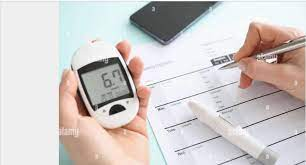

**Content:**

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

1. Pregnancies: Number of times pregnant,
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test,
3. BloodPressure: Diastolic blood pressure (mm Hg),
4. SkinThickness: Triceps skin fold thickness (mm),
5. Insulin: 2-Hour serum insulin (mu U/ml),
6. BMI: Body mass index (weight in kg/(height in m)^2),
7. DiabetesPedigreeFunction: Diabetes pedigree function,
8. Age: Age (years),
9. Outcome: Class variable (0 or 1)

# Import Libraries

In [2]:
#Load libraries
#Data processing and Data Manipulation
import pandas as pd
#Calculation & array usage
import numpy as np
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [3]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.head() #printed first five rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#  Exploratory Data Analysis


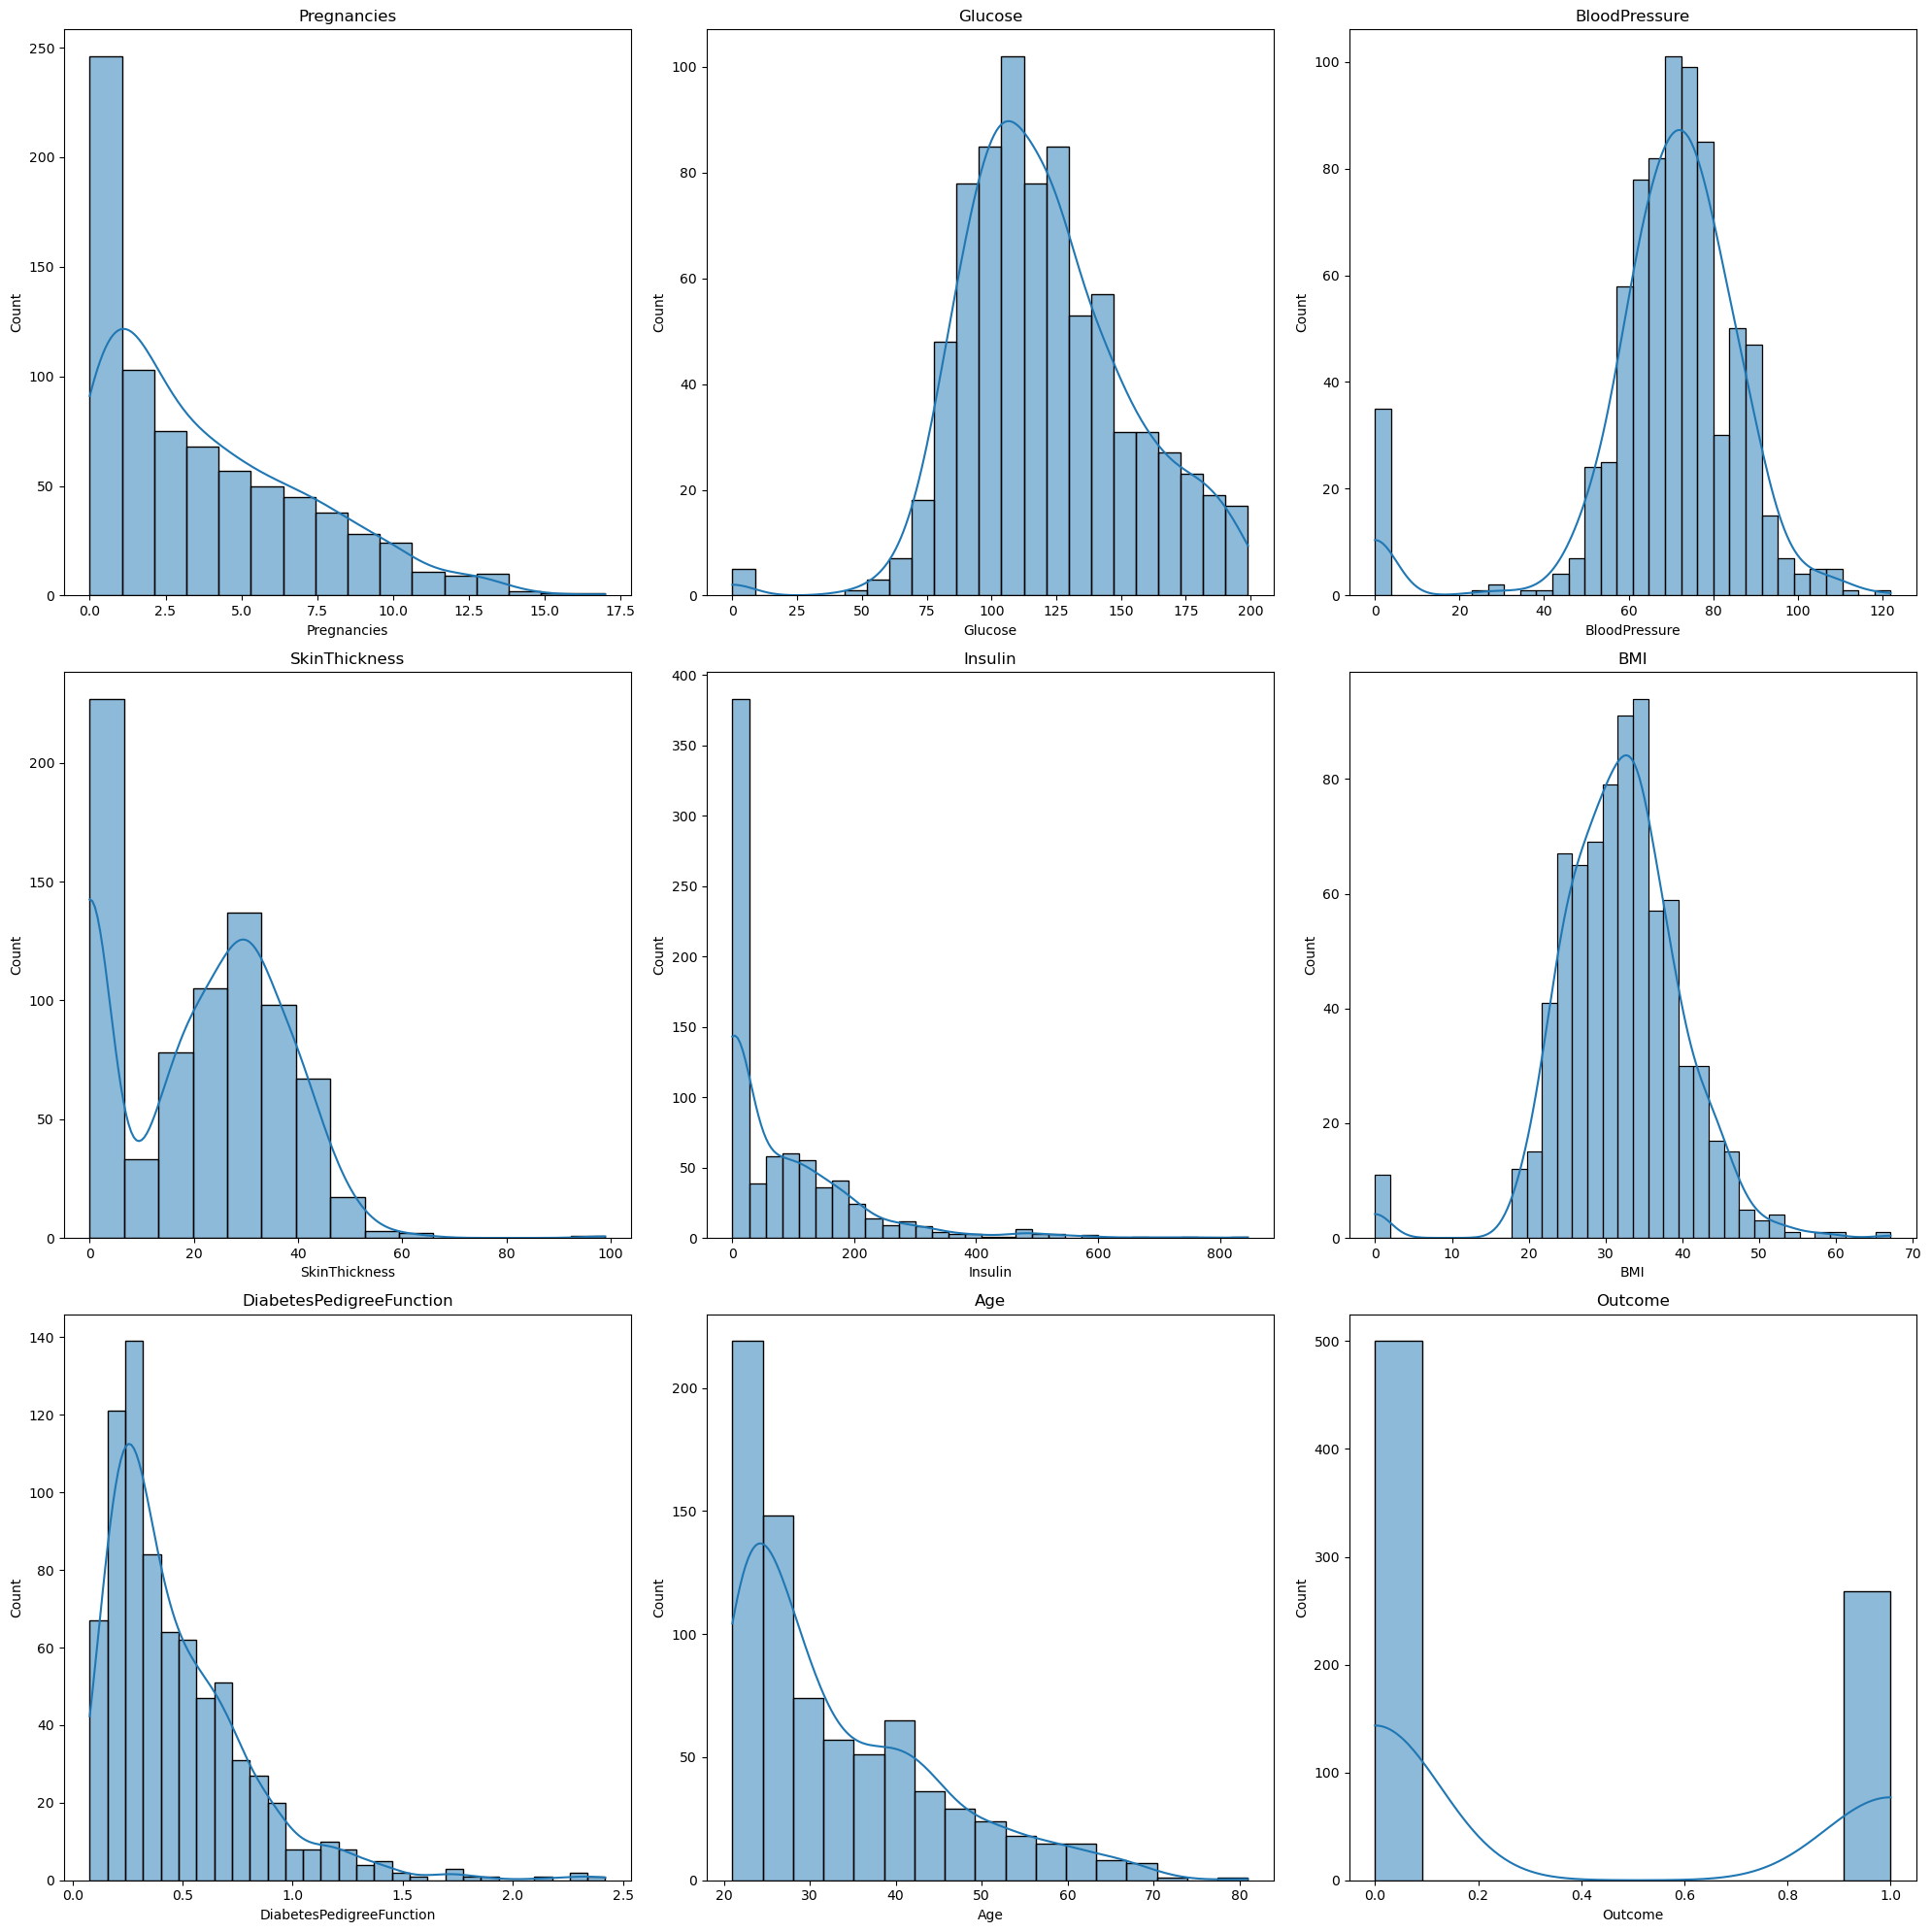

In [5]:
plt.figure(figsize=(20, 20))

columns_to_plot = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                   'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df[column], kde=True)
    plt.title(column)
    plt.xlabel(column)

plt.tight_layout()
plt.show() # ploting histogrom of each column in data frame

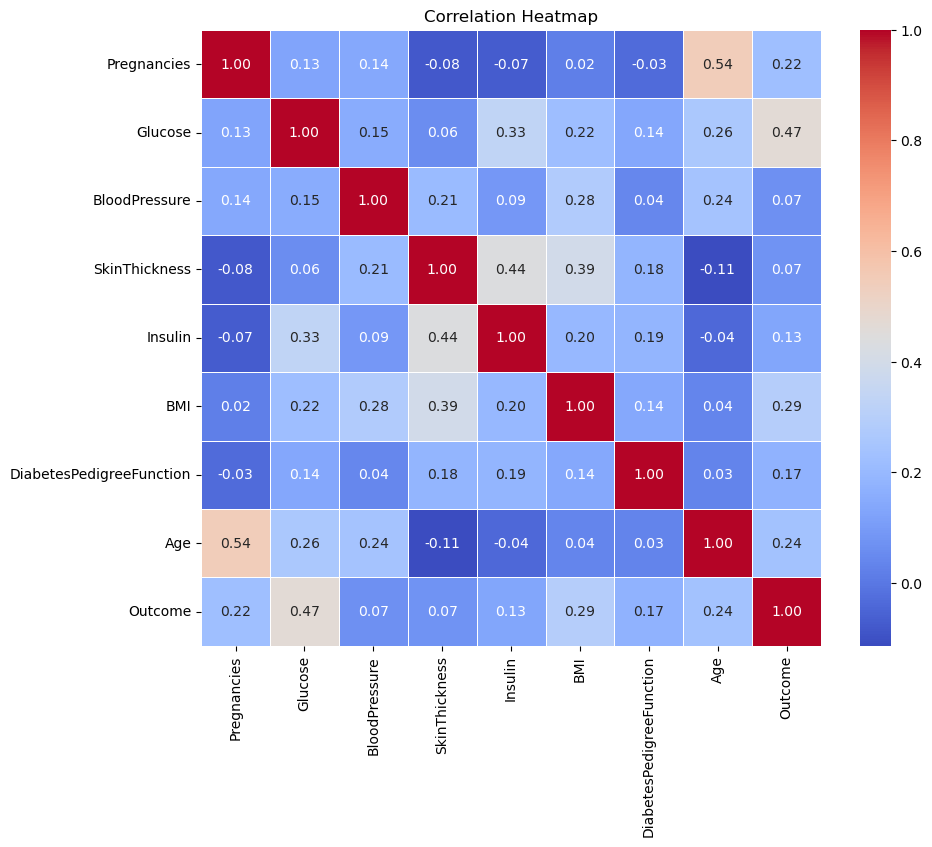

In [6]:
# Replace 'data' with your actual DataFrame containing the variables
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# Ratio of patients suffering in diabetes

In [7]:
df.Outcome.value_counts() 

0    500
1    268
Name: Outcome, dtype: int64

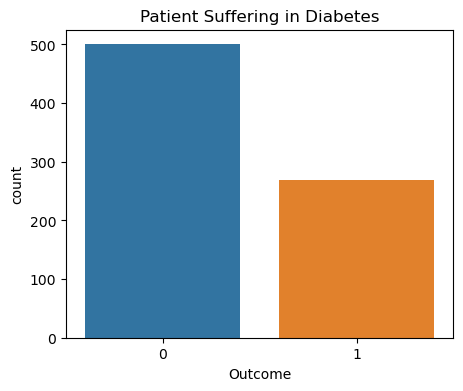

In [8]:
plt.figure(figsize=(5,4))
sns.countplot(x=df.Outcome)
plt.title("Patient Suffering in Diabetes")
plt.show()

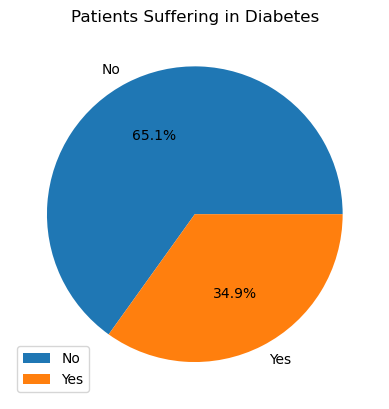

In [9]:
plt.pie(df.Outcome.value_counts(),labels = ["No","Yes"],autopct ="%.01f%%")
plt.legend(["No","Yes"])
plt.title('Patients Suffering in Diabetes')
plt.show()

# Observation:

# Which Factors effecting diabetes?

# Is age effect diabetes?

(array([300., 157.,  92.,  86.,  52.,  34.,  26.,  16.,   4.,   1.]),
 array([21., 27., 33., 39., 45., 51., 57., 63., 69., 75., 81.]),
 <BarContainer object of 10 artists>)

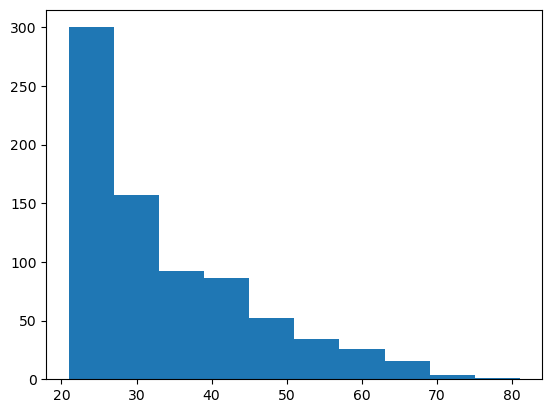

In [10]:
plt.hist(df['Age'])

In [11]:
df.Age.describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [12]:
#create age groups
bin_edges = [20, 40, 60, 80, 100]
df['Age_Group'] = pd.cut(df['Age'], bins=bin_edges)

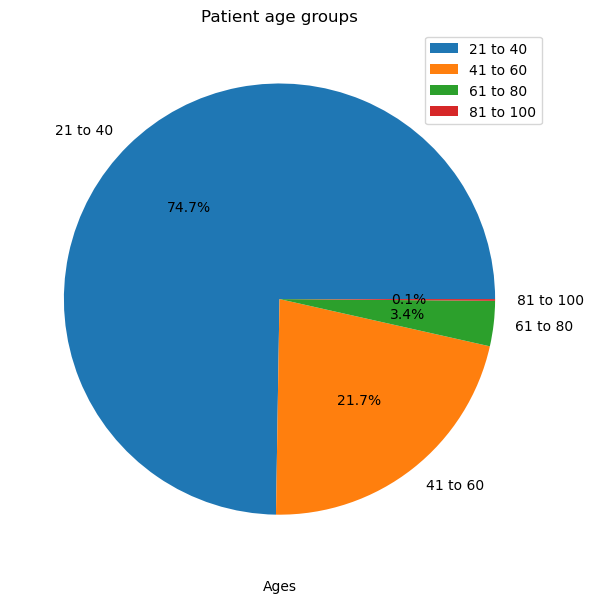

In [13]:
plt.figure(figsize=(7,7))
plt.pie(df['Age_Group'].value_counts(),labels = ["21 to 40","41 to 60","61 to 80","81 to 100"],autopct ="%.01f%%")
plt.title('Patient age groups')
plt.xlabel("Ages")
plt.legend(["21 to 40","41 to 60","61 to 80","81 to 100"])
plt.show()

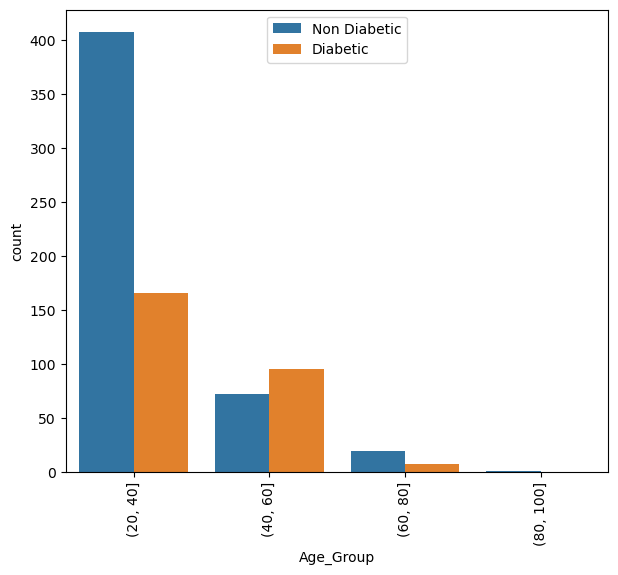

In [14]:
plt.figure(figsize=(7,6))
plt.xticks(rotation = 90)
sns.countplot(x=df['Age_Group'] , hue= df.Outcome)
plt.legend(['Non Diabetic','Diabetic'])
plt.show()

# Observation:

# Is glucose effect diabetes ?

In [15]:
df.Glucose.describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [16]:
#create groups based on the waiting time column
bins = [0,25,50, 75 , 100 , 125 , 150 ,175 ,200]
df['Glucose_group'] = pd.cut(df['Glucose'], bins=bins)

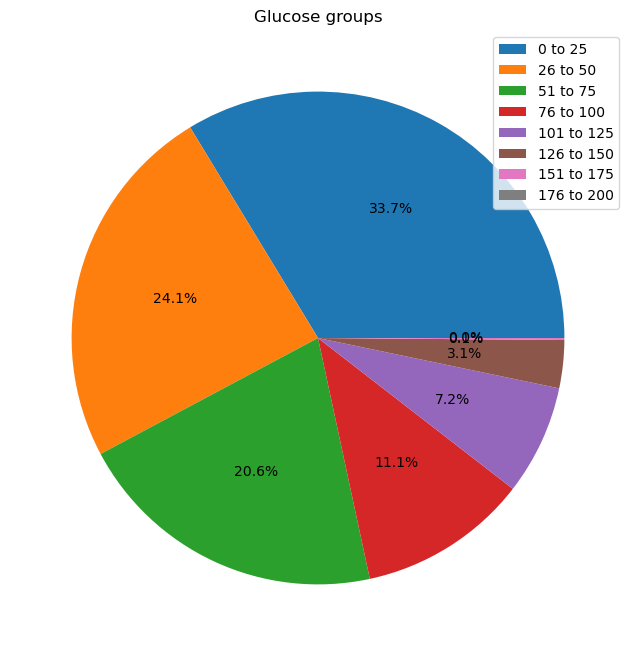

In [17]:
plt.figure(figsize=(8,8))
plt.pie(df['Glucose_group'].value_counts(),autopct ="%.01f%%")
plt.title('Glucose groups')
plt.legend(["0 to 25","26 to 50","51 to 75","76 to 100","101 to 125","126 to 150","151 to 175","176 to 200"])
plt.show()

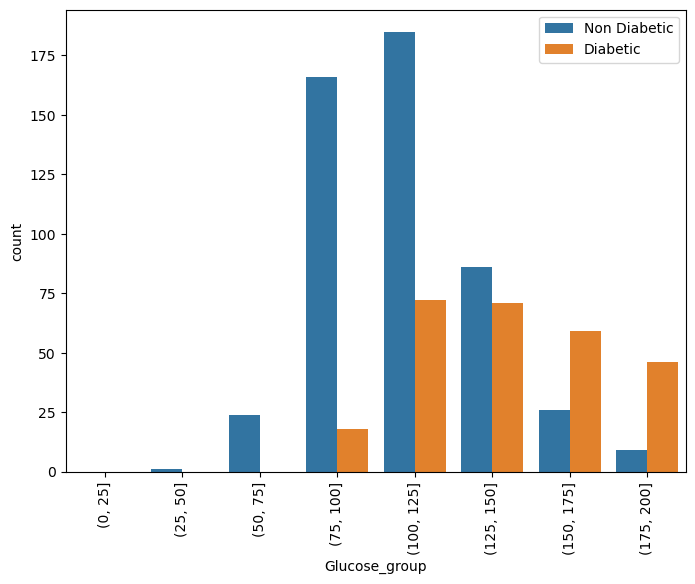

In [18]:
plt.figure(figsize=(8,6))
plt.xticks(rotation = 90)
sns.countplot(x= df['Glucose_group'], hue= df.Outcome)
plt.legend(['Non Diabetic','Diabetic'])

plt.show()

# Observation:

# Is bloodpressure effect diabetes?

In [19]:
df.BloodPressure.describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [20]:
#create age groups
bin_edge = [0,25,50, 75 , 100, 125]
df['BloodPressure_Group'] = pd.cut(df['BloodPressure'], bins=bin_edge)

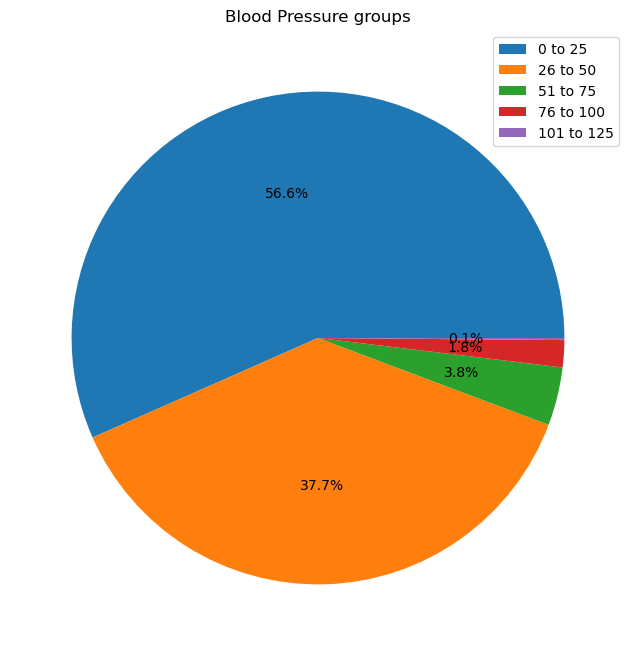

In [21]:
plt.figure(figsize=(8,8))
plt.pie(df['BloodPressure_Group'].value_counts(),autopct ="%.01f%%")
plt.title('Blood Pressure groups')
plt.legend(["0 to 25","26 to 50","51 to 75","76 to 100","101 to 125"])
plt.show()

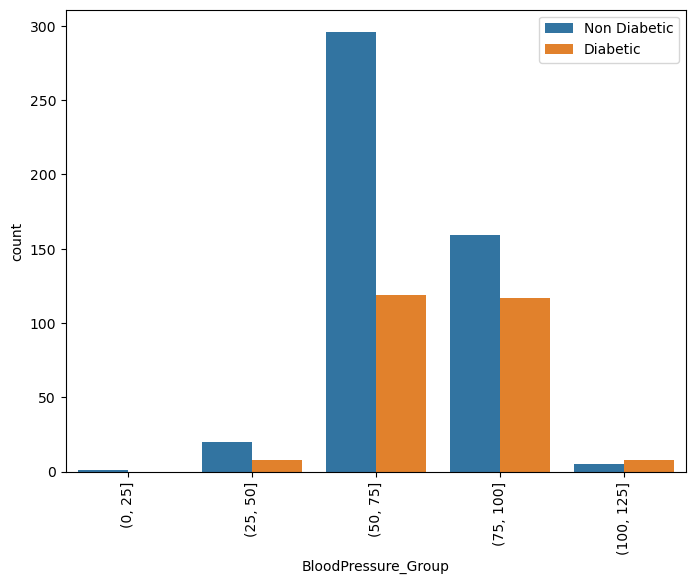

In [22]:
plt.figure(figsize=(8,6))
plt.xticks(rotation = 90)
sns.countplot(x= df['BloodPressure_Group'] , hue= df.Outcome)
plt.legend(['Non Diabetic','Diabetic'])
plt.show()

# Observation:

# Is insulin effect diabetes?

In [23]:
df.Insulin.describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

In [24]:
bine = [0,100 ,200 , 300 , 400 , 500 , 600 ,700 ,800 , 900]
df['Insulin_Group'] = pd.cut(df['Insulin'], bins=bine)

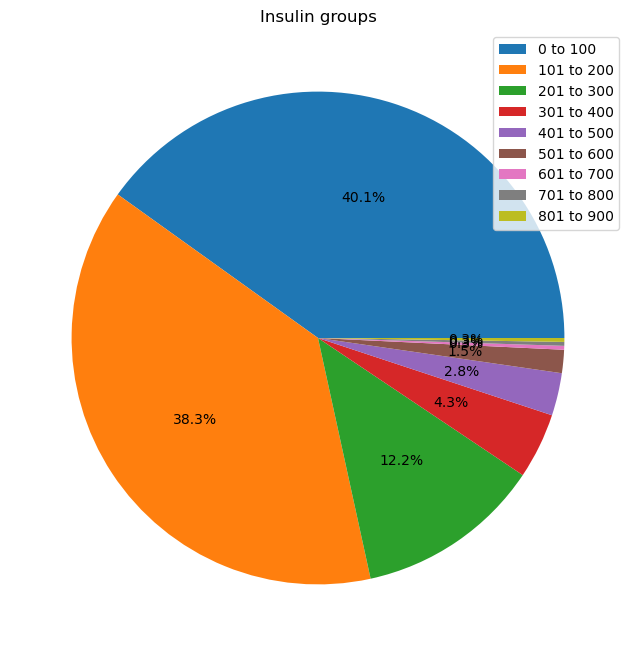

In [25]:
plt.figure(figsize=(8,8))
plt.pie(df['Insulin_Group'].value_counts(),autopct ="%.01f%%")
plt.title('Insulin groups')
plt.legend(["0 to 100","101 to 200","201 to 300","301 to 400","401 to 500","501 to 600","601 to 700","701 to 800","801 to 900"])
plt.show()

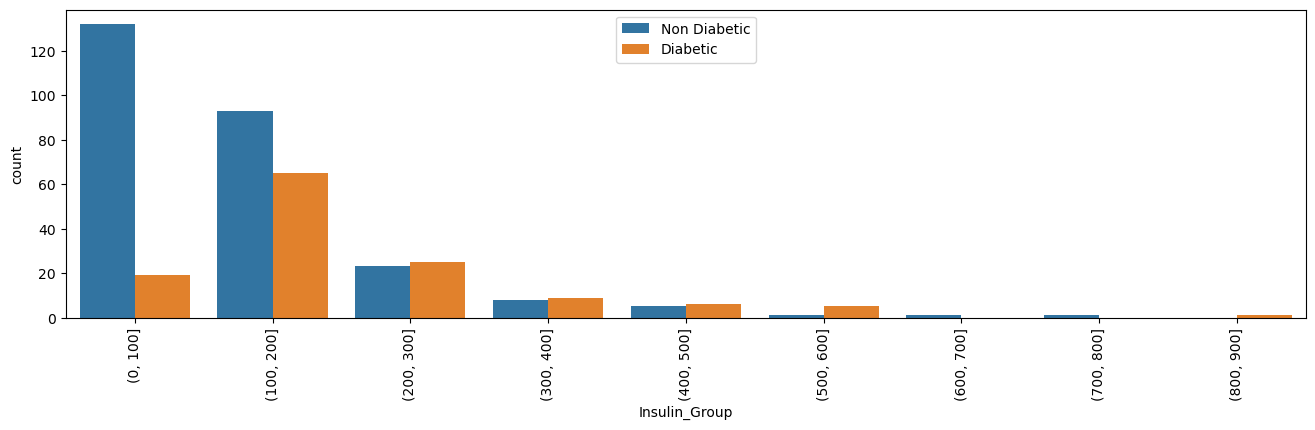

In [26]:
plt.figure(figsize=(16,4))
plt.xticks(rotation = 90)
sns.countplot(x= df['Insulin_Group'], hue= df.Outcome)
plt.legend(['Non Diabetic','Diabetic'])
plt.show()

# Observation:

# Is pregnancies effect diabetes?

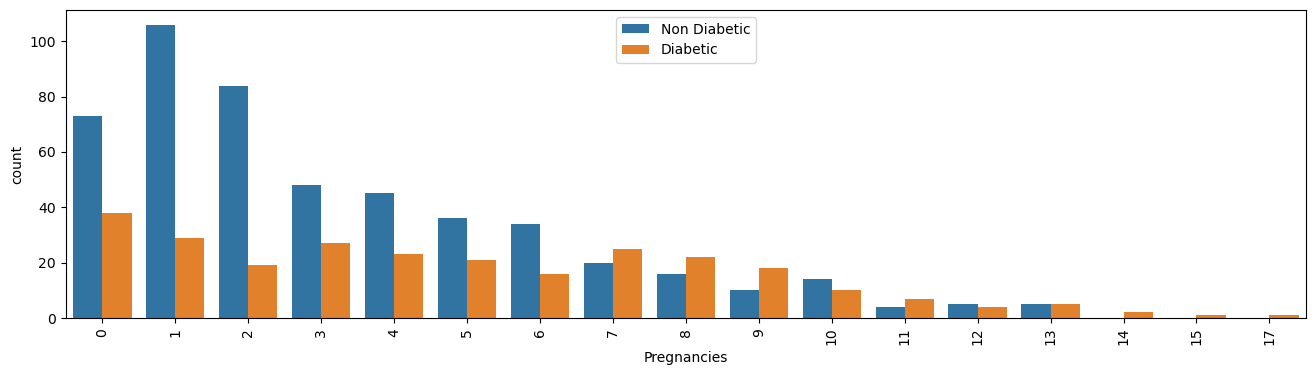

In [27]:
plt.figure(figsize=(16,4))
plt.xticks(rotation = 90)
sns.countplot(x= df.Pregnancies , hue= df.Outcome)
plt.legend(['Non Diabetic','Diabetic'])
plt.show()

# Observation:

# Comparison
Blood Pressure with Age

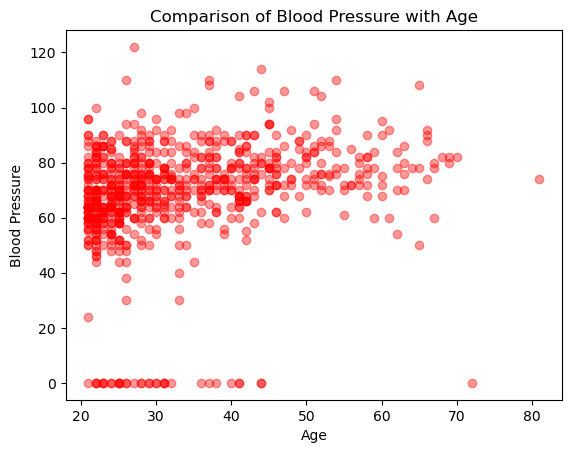

In [28]:
plt.scatter(df.Age,df.BloodPressure,color="red",alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.title("Comparison of Blood Pressure with Age")
plt.show()

# Comparison
Glucose with Age

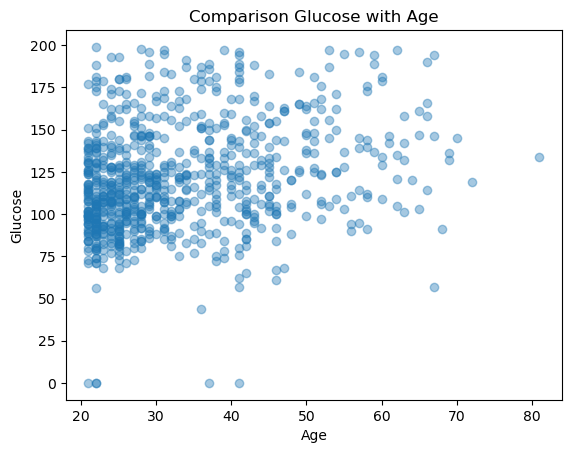

In [29]:
plt.scatter(df.Age,df.Glucose,alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.title('Comparison Glucose with Age')
plt.show()


# Comparison
Insulin with Glucose

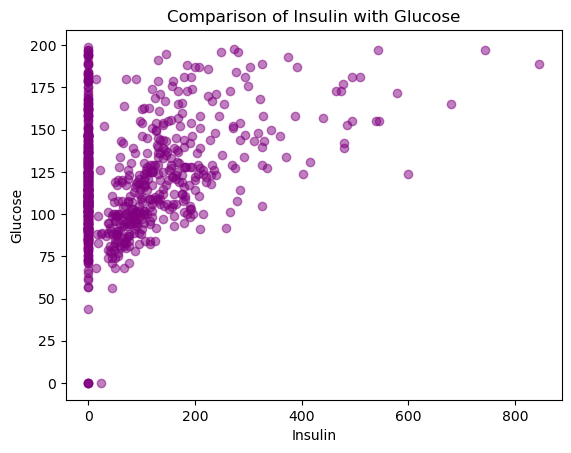

In [30]:
plt.scatter(df.Insulin,df.Glucose,color="purple",alpha=0.5)
plt.xlabel("Insulin")
plt.ylabel("Glucose")
plt.title("Comparison of Insulin with Glucose")
plt.show()